## DIABETES-PREDICTION-MODEL

In [414]:
from IPython.core.display import HTML
HTML('<img src="https://static.wixstatic.com/media/afab6c_7a90db16465c44c5ae3257ac8366fa16~mv2.jpg/v1/fill/w_1016,h_496,al_c,q_85,usm_0.66_1.00_0.01,enc_avif,quality_auto/diabetes%20graph.jpg" width="1200px">')

## About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage.**

The datasets consists of several medical predictor variables and one target variable, Outcome.
1. Pregnancies :- Number of times the patient has been pregnant (useful for understanding diabetes risk in women).
2. Glucose :- Blood glucose concentration (mg/dL), a key indicator of diabetes.
3. BloodPressure :- Diastolic blood pressure (mm Hg). High blood pressure is associated with diabetes risk.
4. SkinThickness :- Thickness of the skin fold on the triceps (mm), used to estimate body fat percentage.
5. Insulin	Serum insulin level (μU/mL) :- which helps in detecting insulin resistance and diabetes.
6. BMI	Body Mass Index (kg/m²) :- a measure of body fat based on height and weight.
7. DiabetesPedigreeFunction :- A score that estimates genetic predisposition to diabetes based on family history.
8. Age :- Age of the patient in years. Older individuals have a higher risk of diabetes.

**Outcome :- Target variable (1 = Diabetes, 0 = No Diabetes).**

### Aim is to build a Machine Learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [329]:
# Importing Data manipulation Libraries
import pandas as pd
import numpy as np

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict

# Importing Scikit learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [330]:
df = pd.read_csv('Diabetes Prediction.csv')

In [331]:
df.sample(frac=1)  # Shuffles data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
300,0,167,0,0,0,32.3,0.839,30,1
139,5,105,72,29,325,36.9,0.159,28,0
520,2,68,70,32,66,25.0,0.187,25,0
306,10,161,68,23,132,25.5,0.326,47,1
746,1,147,94,41,0,49.3,0.358,27,1
...,...,...,...,...,...,...,...,...,...
590,11,111,84,40,0,46.8,0.925,45,1
688,1,140,74,26,180,24.1,0.828,23,0
643,4,90,0,0,0,28.0,0.610,31,0
761,9,170,74,31,0,44.0,0.403,43,1


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Data has 768 rows and 9 columns.
- The dataset consists of numerical values with no categorical features.
- Features like Glucose, BMI, and Insulin levels are strong predictors of diabetes.

In [333]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [334]:
# Univariate Analysis
stats = []

for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature' : i,
      'Max' : df[i].max(),
      'Min' : df[i].min(),
      'Mean' : df[i].mean(),
      'Median' : df[i].median(),
      'Standard Deviation' : df[i].std(),
      'Variance' : df[i].var(),
      'Skewness' : df[i].skew(),
      'Kurtosis' : df[i].kurt(),
      '25%' : df[i].quantile(0.25),
      '75%' : df[i].quantile(0.75),
      'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
  })

  stats.append(numerical_stats)
report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8
Feature,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Max,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
Mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
Median,3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0,0.0
Standard Deviation,3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951
Variance,11.354056,1022.248314,374.647271,254.473245,13281.180078,62.159984,0.109779,138.303046,0.227483
Skewness,0.901674,0.173754,-1.843608,0.109372,2.272251,-0.428982,1.919911,1.129597,0.635017
Kurtosis,0.15922,0.64078,5.180157,-0.520072,7.21426,3.290443,5.594954,0.643159,-1.60093
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.24375,24.0,0.0


- Data is non normally distributed.

<Axes: xlabel='Age', ylabel='Count'>

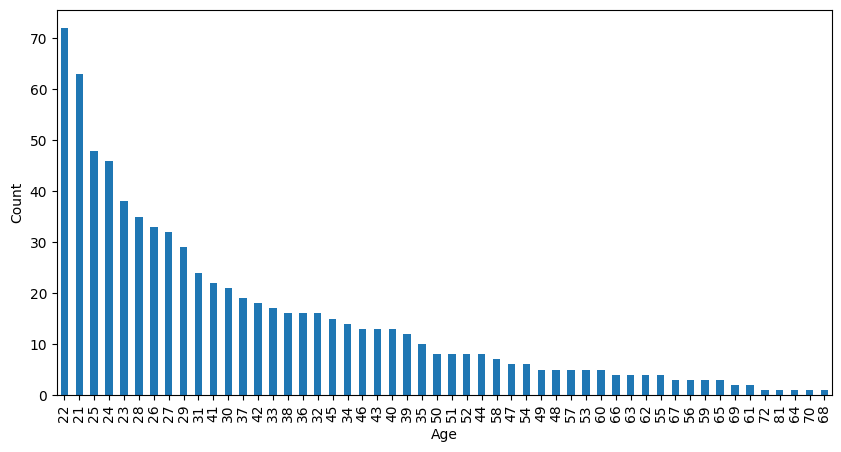

In [335]:
plt.figure(figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Count')
df['Age'].value_counts().plot(kind='bar')

In [336]:
print('Max Age :',df.Age.max())
print('Min Age :',df.Age.min())

Max Age : 81
Min Age : 21


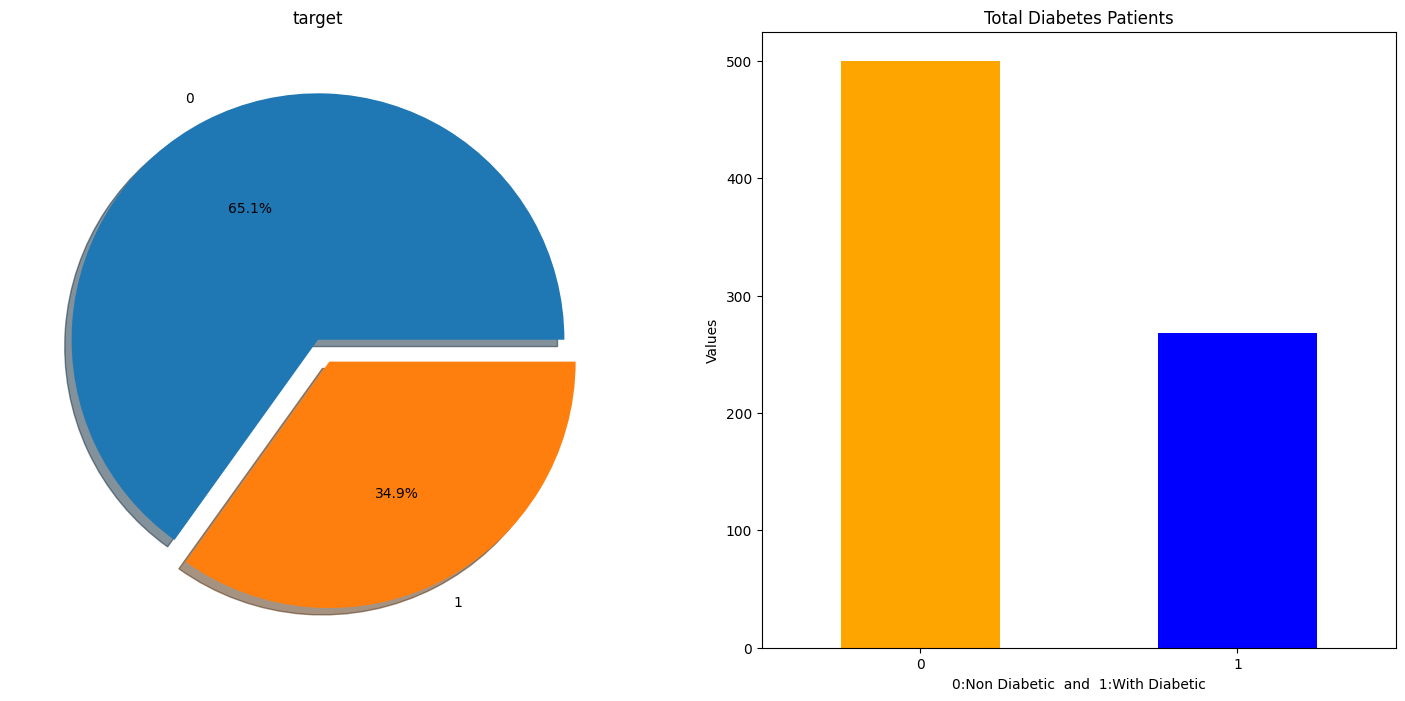

In [337]:
# 0 - Healthy
# 1 - Diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
df.Outcome.value_counts().plot(kind='bar',color = ['orange','blue'])
plt.title('Total Diabetes Patients')
plt.xlabel('0:Non Diabetic  and  1:With Diabetic')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

## Checking Missing/Null Values

In [338]:
for i in df.columns:
    print(i,':-')
    print(df[i].unique())
    print('*'*30)

Pregnancies :-
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
******************************
Glucose :-
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
******************************
BloodPressure :-
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
******************************
SkinThickness :-
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 

- Some columns like Glucose, BloodPressure, SkinThickness, Insulin, BMI may have missing or zero values that need cleaning.

**Replacing 0 values in Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI with the mean of each respective column**

In [339]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies',
        'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [340]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Text(0.5, 1.0, 'Checking the missing values in dataset')

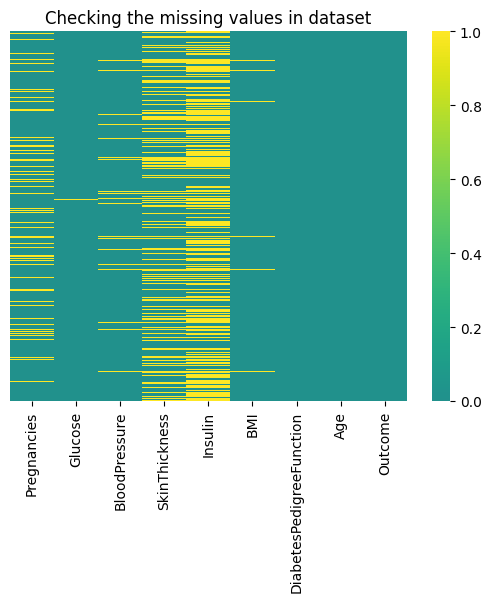

In [341]:
# After replacing the 0 values with there median values

sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', center = 0);
plt.title('Checking the missing values in dataset')

In [342]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [343]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [344]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Text(0.5, 1.0, 'Checking the missing values in dataset')

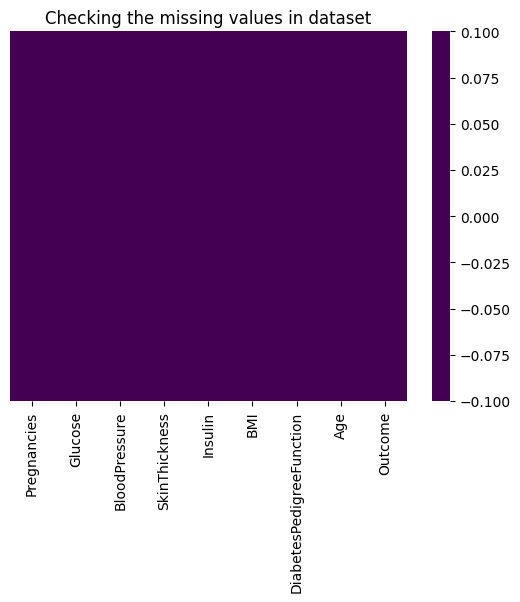

In [345]:
# After replacing the 0 values with there median values

sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', center = 0);
plt.title('Checking the missing values in dataset')

In [346]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [347]:
pd.set_option('display.max_columns',None)

In [348]:
df.shape

(768, 9)

**Some Statistical Analysis**

In [349]:
crosstab1 = pd.crosstab(index=df['Outcome'], columns=df['Glucose'])
crosstab1

Glucose,44.0,56.0,57.0,61.0,62.0,65.0,67.0,68.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,186.0,187.0,188.0,189.0,190.0,191.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0
Outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,1,1,1,1,3,4,1,3,4,2,2,2,3,3,5,6,3,6,9,6,3,7,8,6,9,9,8,6,7,10,8,7,3,17,13,8,9,8,3,10,13,11,10,7,6,11,9,3,9,4,6,9,4,7,8,4,9,7,6,7,7,5,5,8,4,2,3,3,2,2,4,6,2,6,2,3,3,4,3,1,4,4,1,0,2,3,1,2,5,1,0,2,2,1,0,1,1,0,1,3,1,0,0,0,0,0,0,1,0,1,0,0,0,2,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,2,0,1,1,0,3,0,2,0,0,4,1,4,1,3,3,1,3,3,5,0,3,4,2,2,6,1,2,2,4,3,2,3,2,5,7,2,0,6,6,3,3,2,2,4,2,4,2,3,2,5,2,2,2,4,4,5,3,3,1,1,3,3,0,1,4,3,0,6,1,1,2,5,3,2,1,2,3,4,1,2,3,1,5,2,1,2,1,1,3,4,5,1,2,3,1,4,2,3,1,0,1,2,2,3,3,1,1


In [350]:
crosstab2 = pd.crosstab(index=df['Outcome'], columns=df['BMI'])
crosstab2

BMI,18.2,18.4,19.1,19.3,19.4,19.5,19.6,19.9,20.0,20.1,20.4,20.8,21.0,21.1,21.2,21.7,21.8,21.9,22.1,22.2,22.3,22.4,22.5,22.6,22.7,22.9,23.0,23.1,23.2,23.3,23.4,23.5,23.6,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0,25.1,25.2,25.3,25.4,25.5,25.6,25.8,25.9,26.0,26.1,26.2,26.3,26.4,26.5,26.6,26.7,26.8,26.9,27.0,27.1,27.2,27.3,27.4,27.5,27.6,27.7,27.8,27.9,28.0,28.1,28.2,28.3,28.4,28.5,28.6,28.7,28.8,28.9,29.0,29.2,29.3,29.5,29.6,29.7,29.8,29.9,30.0,30.1,30.2,30.3,30.4,30.5,30.7,30.8,30.9,31.0,31.1,31.2,31.3,31.6,31.9,32.0,32.1,32.2,32.3,32.4,32.5,32.6,32.7,32.8,32.9,33.1,33.2,33.3,33.5,33.6,33.7,33.8,33.9,34.0,34.1,34.2,34.3,34.4,34.5,34.6,34.7,34.8,34.9,35.0,35.1,35.2,35.3,35.4,35.5,35.6,35.7,35.8,35.9,36.0,36.1,36.2,36.3,36.4,36.5,36.6,36.7,36.8,36.9,37.0,37.1,37.2,37.3,37.4,37.5,37.6,37.7,37.8,37.9,38.0,38.1,38.2,38.3,38.4,38.5,38.6,38.7,38.8,38.9,39.0,39.1,39.2,39.3,39.4,39.5,39.6,39.7,39.8,39.9,40.0,40.1,40.2,40.5,40.6,40.7,40.8,40.9,41.0,41.2,41.3,41.5,41.8,42.0,42.1,42.2,42.3,42.4,42.6,42.7,42.8,42.9,43.1,43.2,43.3,43.4,43.5,43.6,44.0,44.1,44.2,44.5,44.6,45.0,45.2,45.3,45.4,45.5,45.6,45.7,45.8,46.1,46.2,46.3,46.5,46.7,46.8,47.9,48.3,48.8,49.3,49.6,49.7,50.0,52.3,52.9,53.2,55.0,57.3,59.4,67.1
Outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,1,2,3,1,1,1,2,2,2,4,1,1,5,3,2,2,1,2,3,2,1,1,2,4,3,1,0,2,3,2,1,2,4,1,6,3,3,1,4,5,2,1,6,2,6,2,4,1,5,1,6,4,3,4,1,2,2,3,1,3,1,1,2,2,4,3,3,4,4,7,0,4,1,1,1,3,3,2,6,2,3,3,1,4,4,3,5,3,3,3,15,1,0,3,2,1,7,3,1,0,7,1,5,2,8,1,1,0,6,4,1,1,6,1,3,7,4,1,4,2,3,1,4,3,4,2,3,2,2,3,1,3,1,2,1,4,3,4,1,3,4,2,1,2,1,1,0,1,2,1,5,3,0,0,3,1,2,1,3,3,1,0,0,3,2,1,1,3,1,2,1,1,2,2,1,1,4,2,1,1,1,1,1,1,1,2,4,1,1,0,0,0,2,2,0,0,1,1,0,1,0,2,1,1,0,0,1,1,2,0,0,0,1,1,1,1,1,3,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,2,2,3,0,0,2,1,0,1,1,3,0,0,1,0,3,2,0,1,1,1,3,0,2,4,3,0,1,4,5,0,2,2,1,1,5,0,7,0,5,0,0,3,4,2,0,2,3,8,0,0,6,0,4,3,2,1,2,1,4,6,1,3,3,1,1,3,3,1,1,0,1,3,1,1,1,3,1,1,0,2,2,3,3,0,1,0,1,2,1,0,1,1,2,2,2,2,2,0,2,0,1,3,0,1,0,0,2,2,1,0,3,1,0,0,1,2,1,0,0,1,0,0,0,2,1,1,1,0,1,1,1,0,3,2,1,0,0,3,1,1,4,1,0,2,2,1,1,1,0,0,0,0,1,1,2,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [351]:
crosstab2 = pd.crosstab(index=df['Outcome'], columns=df['Insulin'])
crosstab2

Insulin,14.0,15.0,16.0,18.0,22.0,23.0,25.0,29.0,32.0,36.0,37.0,38.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,63.0,64.0,65.0,66.0,67.0,68.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,94.0,95.0,96.0,99.0,100.0,102.5,105.0,106.0,108.0,110.0,112.0,114.0,115.0,116.0,119.0,120.0,122.0,125.0,126.0,127.0,128.0,129.0,130.0,132.0,135.0,140.0,142.0,144.0,145.0,146.0,148.0,150.0,152.0,155.0,156.0,158.0,159.0,160.0,165.0,166.0,167.0,168.0,169.5,170.0,171.0,175.0,176.0,178.0,180.0,182.0,183.0,184.0,185.0,188.0,190.0,191.0,192.0,193.0,194.0,196.0,200.0,204.0,205.0,207.0,210.0,215.0,220.0,225.0,228.0,230.0,231.0,235.0,237.0,240.0,245.0,249.0,250.0,255.0,258.0,265.0,270.0,271.0,272.0,274.0,275.0,277.0,278.0,280.0,284.0,285.0,291.0,293.0,300.0,304.0,310.0,318.0,321.0,325.0,326.0,328.0,330.0,335.0,342.0,360.0,370.0,375.0,387.0,392.0,402.0,415.0,440.0,465.0,474.0,478.0,480.0,485.0,495.0,510.0,540.0,543.0,545.0,579.0,600.0,680.0,744.0,846.0
Outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,2,1,2,1,0,1,2,2,1,2,1,1,1,3,3,1,2,5,3,1,1,2,4,2,5,2,1,1,2,1,3,3,1,5,2,1,2,4,1,1,2,3,5,2,2,1,1,3,3,1,2,1,2,2,1,2,0,3,7,2,0,0,6,236,10,3,1,4,1,0,4,2,1,6,1,2,2,0,1,0,3,1,4,8,1,0,1,0,2,0,2,2,0,2,0,2,2,1,0,2,0,2,0,0,2,1,3,2,1,0,0,1,3,0,1,1,1,1,3,1,1,0,3,2,0,0,1,1,1,1,0,1,0,0,0,1,0,2,1,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,2,1,0,0,0,2,2,1,0,1,0,0,2,0,2,2,0,0,2,1,2,1,1,0,1,6,1,2,1,0,2,2,1,0,2,0,2,3,0,1,2,2,0,2,2,138,0,1,3,1,0,4,1,0,1,2,0,1,1,1,0,2,0,1,0,1,2,2,1,2,2,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,2,1,1,1,0,1,1,0,0,1


<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

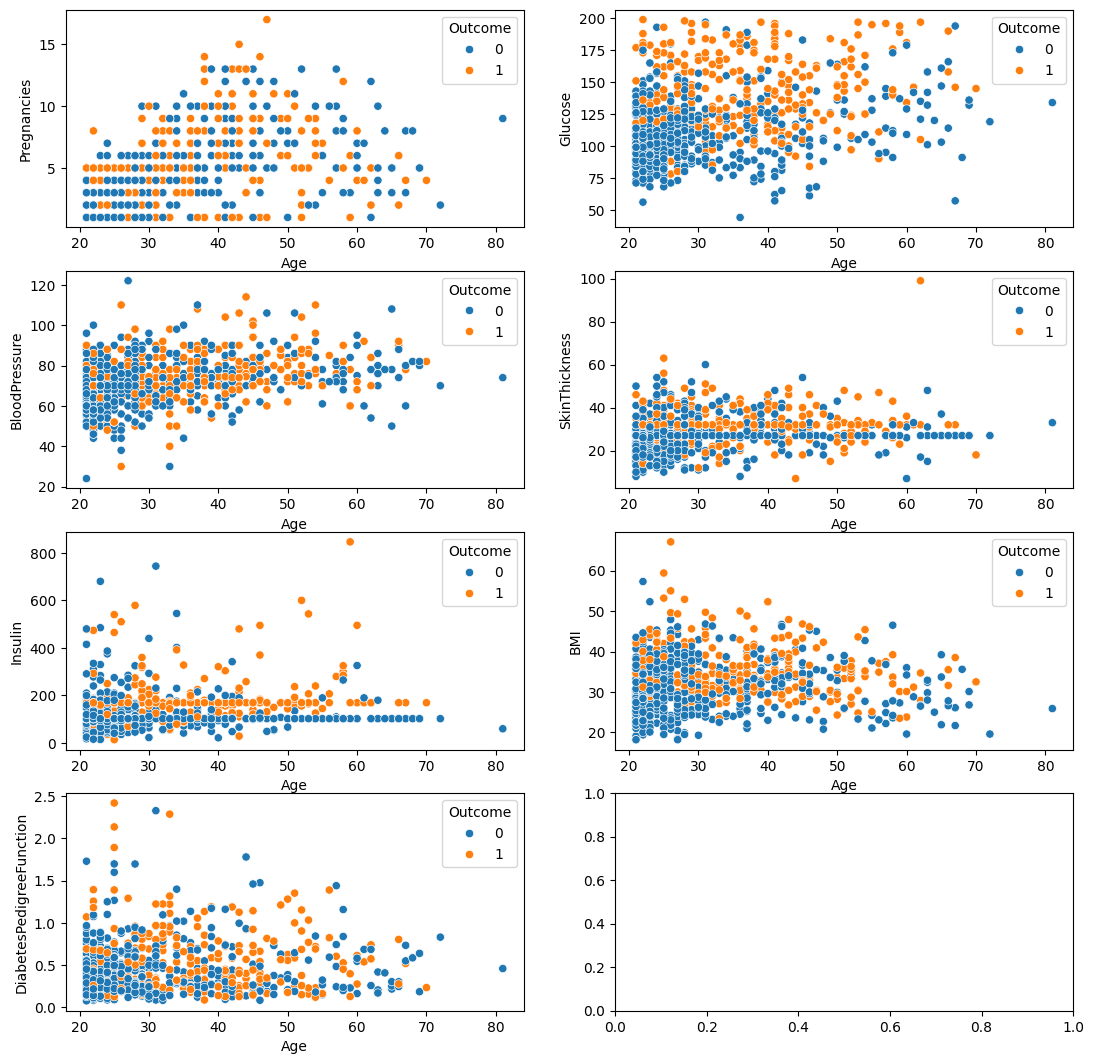

In [352]:
# Bi Variate Analysis

fig,ax = plt.subplots(4,2,figsize = (13,13), facecolor = 'white')
sns.scatterplot(ax=ax[0][0] , x = df['Age'] , y = df['Pregnancies'], hue = df['Outcome'])
sns.scatterplot(ax=ax[0][1], x = df['Age'] , y = df['Glucose'], hue = df['Outcome'])
sns.scatterplot(ax=ax[1][0], x = df['Age'] , y = df['BloodPressure'], hue = df['Outcome'])
sns.scatterplot(ax=ax[1][1], x = df['Age'] , y = df['SkinThickness'], hue = df['Outcome'])
sns.scatterplot(ax=ax[2][0], x = df['Age'] , y = df['Insulin'], hue = df['Outcome'])
sns.scatterplot(ax=ax[2][1], x = df['Age'] , y = df['BMI'], hue = df['Outcome'])
sns.scatterplot(ax=ax[3][0], x = df['Age'] , y = df['DiabetesPedigreeFunction'], hue = df['Outcome'])

# Checking Data Distribution(Skewness) through Visualization

Skewness of Pregnancies :-  1.0273578103254406
Skewness of Glucose :-  0.5312839835944562
Skewness of BloodPressure :-  0.14055505233293128
Skewness of SkinThickness :-  0.8158795516469254
Skewness of Insulin :-  3.0221288568337097
Skewness of BMI :-  0.605230559480793
Skewness of DiabetesPedigreeFunction :-  1.9161592037386292
Skewness of Age :-  1.127389259531697
Skewness of Outcome :-  0.6337757030614577


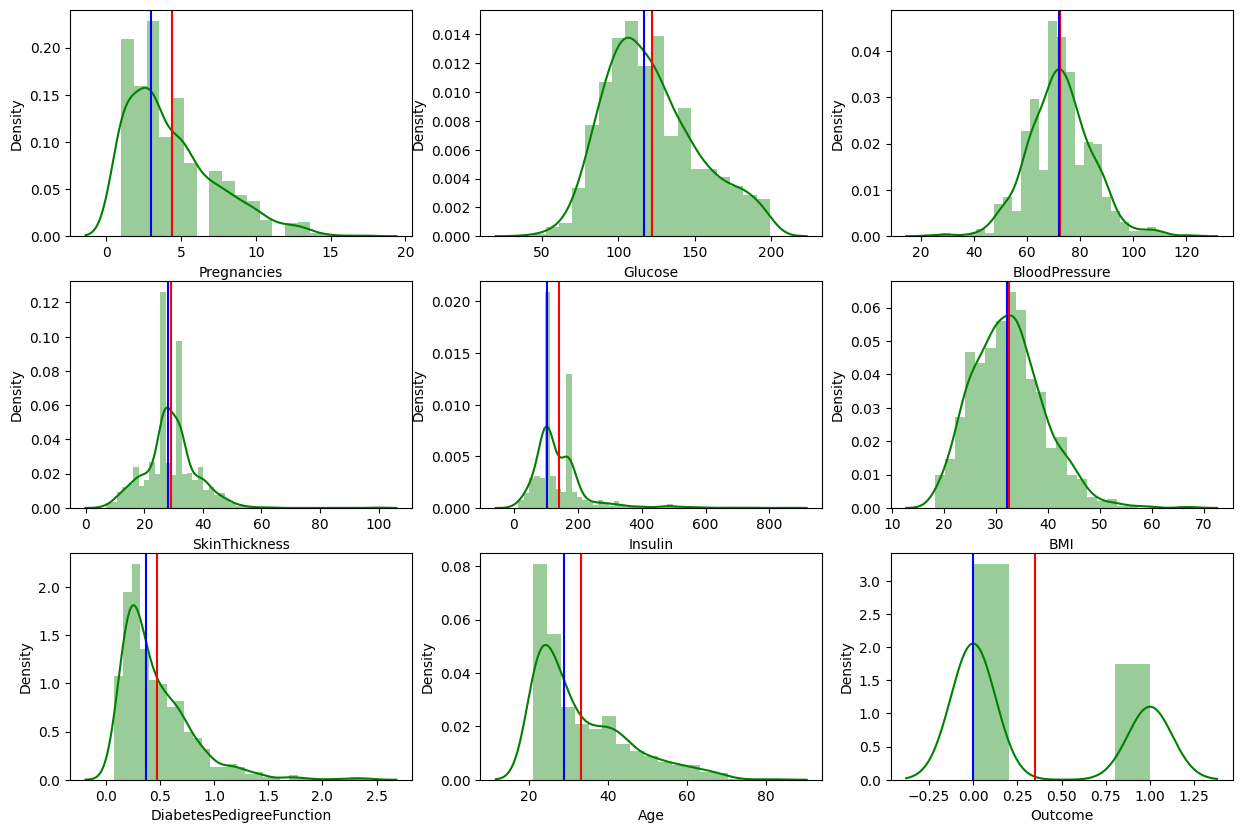

In [353]:
from scipy.stats import skew

plt.figure(figsize = (15,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i], hist=True, color='green')
    plt.axvline(df[i].mean(), color='red', label='Mean')
    plt.axvline(df[i].median(), color='blue', label='Median')
    print(f"Skewness of {i} :- ",skew(df[i]))
plt.show()

# Checking Outliers

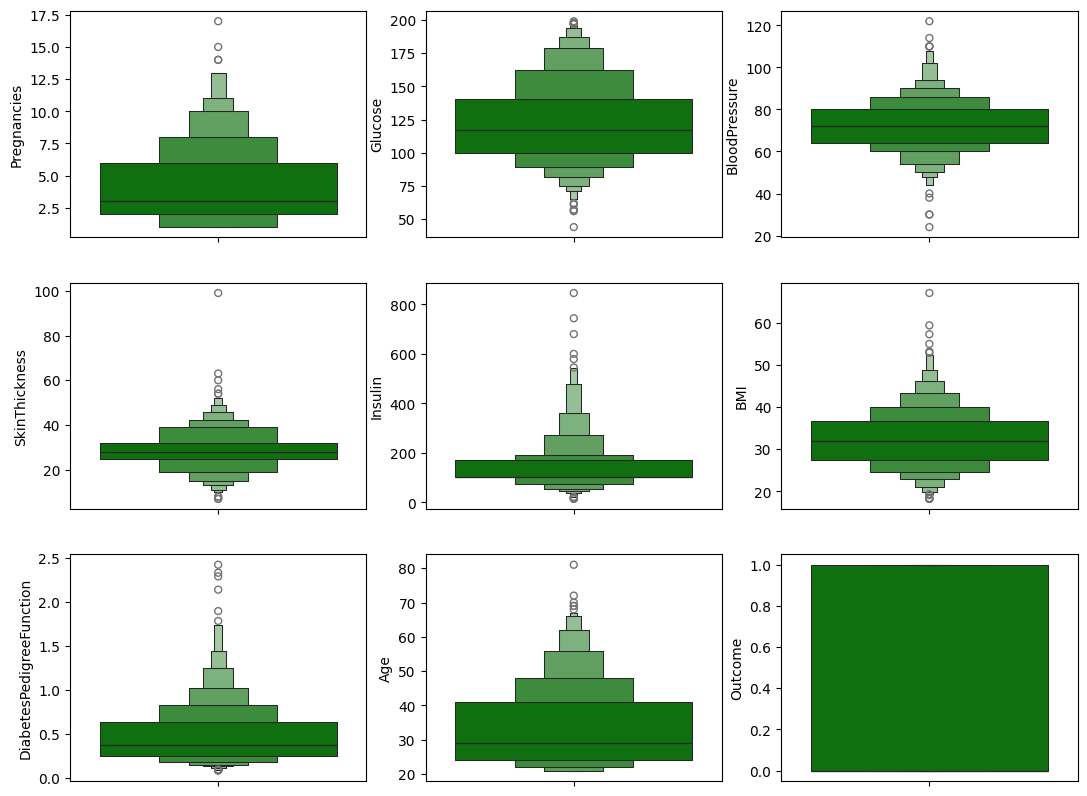

In [354]:
plt.figure(figsize = (13,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i], color='green')
plt.show()

In [355]:
from scipy.stats.mstats import winsorize

df = df.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))  # Trims the top and bottom 5%
#df_winsorized.to_csv("winsorized_data.csv", index=False)

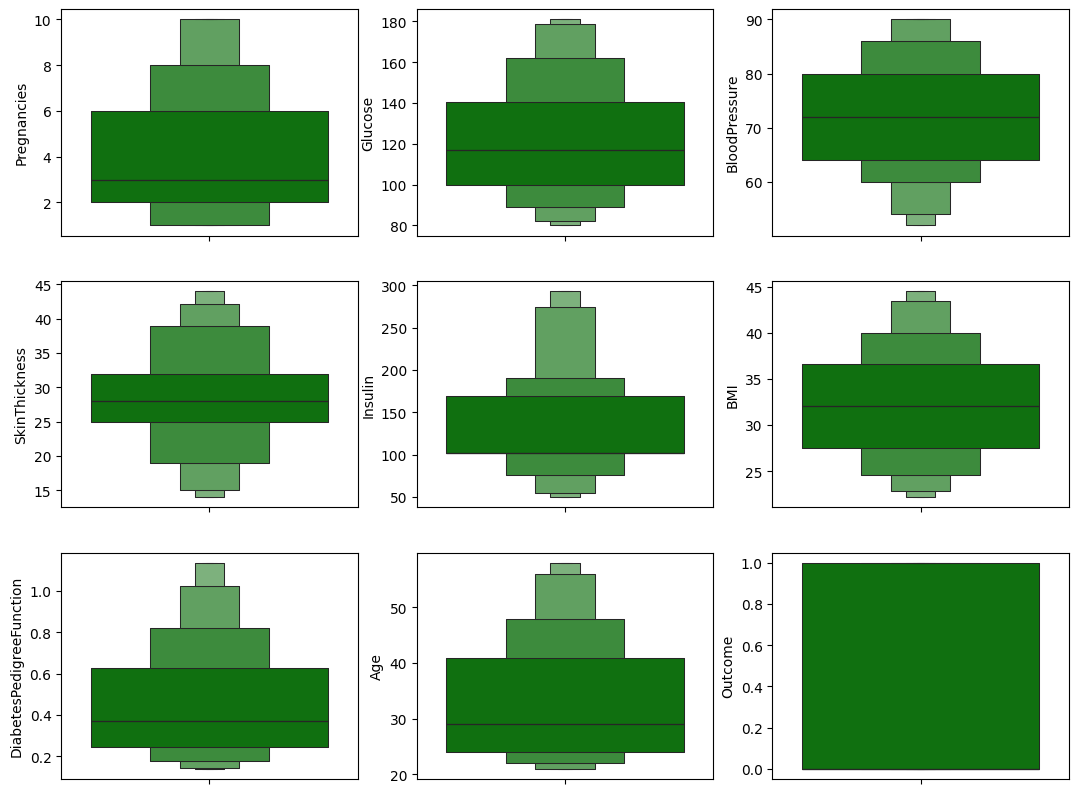

In [356]:
plt.figure(figsize = (13,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i], color='green')
plt.show()

# Cheking Correlation

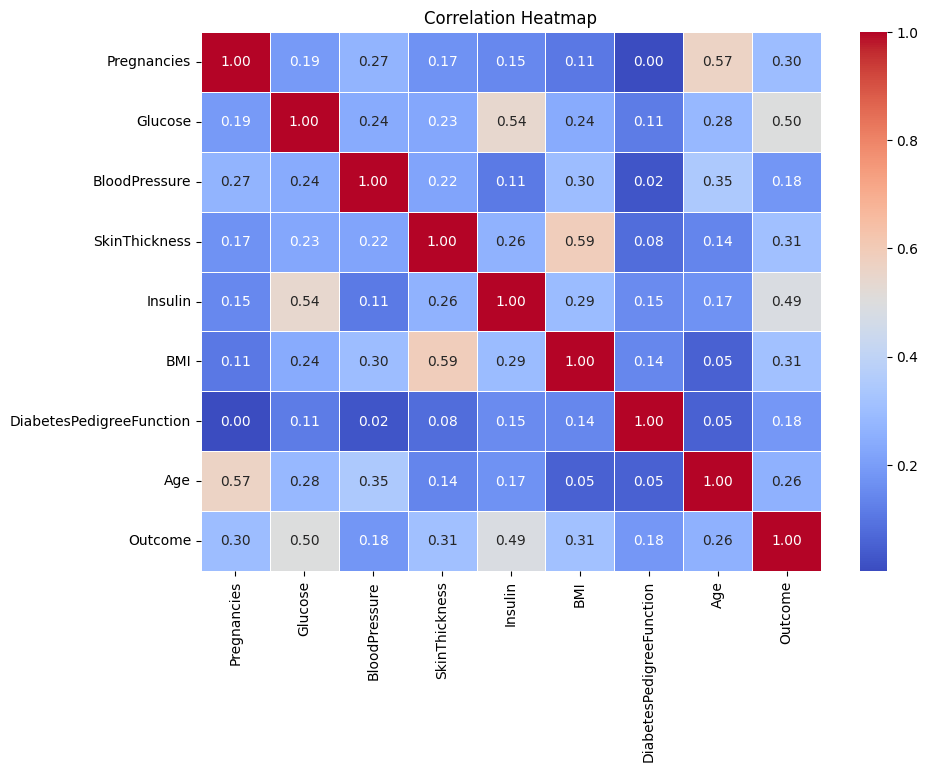

In [357]:
# Heatmap for correlation

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Obsevation**
- Strong positive correlation between Glucose and Outcome (0.49), suggesting that higher glucose levels are associated with the outcome being studied. Similarly, Age and Pregnancies show a moderate positive correlation (0.54).

## Feature Enginnering

In [358]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [359]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [360]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [361]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [362]:
df['NewBMI'].unique()

['Obesity 2', 'Obesity 3']
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [363]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [364]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [365]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [366]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [367]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,181.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,5.0,137.0,52.0,35.0,168.0,43.1,1.136,33,1,False,False,True,False,False,False,False,False,False,True


In [368]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [369]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [370]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


# Splitting Data

In [371]:
X = df.drop(columns=['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)
y = df['Outcome']

In [372]:
cols = X.columns
index = X.index

In [373]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,181.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,52.0,35.0,168.0,43.1,1.136,33


In [374]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [375]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647
2,1.25,1.580247,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471
3,-0.50,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588
4,0.50,0.493827,-1.250,1.000000,0.977612,1.214286,1.996078,0.235294


In [376]:
X = pd.concat([X, categorical_df], axis=1)

In [377]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,False,True,False,False,False,False,False,False,False,True
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,False,True,False,False,False,True,False,True,False,False
2,1.25,1.580247,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,False,True,False,False,False,False,False,False,False,True
3,-0.50,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,False,True,False,False,False,True,False,True,False,False
4,0.50,0.493827,-1.250,1.000000,0.977612,1.214286,1.996078,0.235294,False,False,True,False,False,False,False,False,False,True


In [378]:
# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=32)

## SMOTE TECHNIQUE

In [379]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [380]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [381]:
"""
# Applying PCA (Select number of components)
pca = PCA(n_components=15)  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
"""

'\n# Applying PCA (Select number of components)\npca = PCA(n_components=15)  \nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\n'

In [404]:
models = {
    'LogisticRegression' : LogisticRegression(), 
    'RandomForestClassifier' : RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = 0.75, 
                                                      min_samples_leaf = 3, min_samples_split = 3, n_estimators = 50),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'xgboost' : XGBClassifier(max_depth = 5, n_estimators = 50),
    'SVM' : SVC(C=10, gamma = 0.01, probability=True),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}

for i in models:
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: ',i)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print('Training Accuracy:',model.score(X_train,y_train))
    print('Testing Accuracy:',model.score(X_test,y_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('*'*50)

Model:  LogisticRegression
Accuracy: 0.8528138528138528
Training Accuracy: 0.8371104815864022
Testing Accuracy: 0.8528138528138528
Confusion Matrix:
 [[124  23]
 [ 11  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       147
           1       0.76      0.87      0.81        84

    accuracy                           0.85       231
   macro avg       0.84      0.86      0.85       231
weighted avg       0.86      0.85      0.85       231

**************************************************
Model:  RandomForestClassifier
Accuracy: 0.8787878787878788
Training Accuracy: 0.9348441926345609
Testing Accuracy: 0.8787878787878788
Confusion Matrix:
 [[132  15]
 [ 13  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       147
           1       0.83      0.85      0.84        84

    accuracy                           0.88       231
   mac

## ANN Model

In [384]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


In [405]:
model_ann = Sequential()

# Input Layer
model_ann.add(Dense(128, activation='relu', input_dim=18, kernel_regularizer=l2(0.001)))
model_ann.add(BatchNormalization())  # Normalizing the inputs
model_ann.add(Dropout(0.2))  # Prevents over-reliance on features

# Hidden Layers
model_ann.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_ann.add(Dropout(0.2))

model_ann.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_ann.add(Dropout(0.2))

model_ann.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))

# Output Layer (for classification)
model_ann.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multi-class

# Compile Model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [406]:
history = model_ann.fit(X_train, y_train, 
                        epochs=500, batch_size= 32, 
                        validation_split=0.2, callbacks=[early_stop])

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.6389 - loss: 0.8665 - val_accuracy: 0.7958 - val_loss: 0.8411
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7737 - loss: 0.6407 - val_accuracy: 0.8239 - val_loss: 0.7747
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8462 - loss: 0.5670 - val_accuracy: 0.8310 - val_loss: 0.7403
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8099 - loss: 0.5646 - val_accuracy: 0.8310 - val_loss: 0.7142
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8222 - loss: 0.5448 - val_accuracy: 0.8310 - val_loss: 0.6941
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8694 - loss: 0.4998 - val_accuracy: 0.8732 - val_loss: 0.6420
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8465 - loss: 0.5097 - val_accuracy: 0.8662 - val_loss: 0.6185
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8404 - loss: 0.5127 - val_accuracy: 0.

In [407]:
test_loss, test_acc = model_ann.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8059 - loss: 1.0340
Test Accuracy: 0.83, Test Loss: 0.9006


In [408]:
y_pred_ann = model_ann.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Classification Report :\n',classification_report(y_test,y_pred_ann))
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       147
           1       0.75      0.79      0.77        84

    accuracy                           0.83       231
   macro avg       0.81      0.82      0.81       231
weighted avg       0.83      0.83      0.83       231

Accuracy Score : 0.8268398268398268


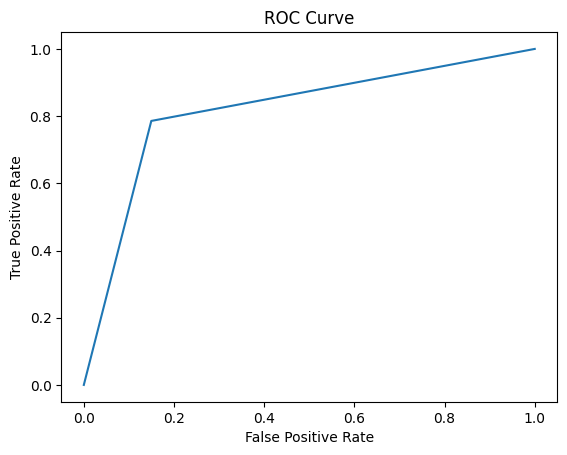

In [409]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Threshold Optimization

In [410]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for Class 1
# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find the threshold that gives the best balance between precision and recall
#f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]) #(precision * recall) / (precision + recall)
#best_threshold = thresholds[np.argmax(f1_scores)]

manual_threshold = 0.60
print("Optimal Threshold:", manual_threshold)

# Apply the new threshold
y_pred_adjusted = (y_probs >= manual_threshold).astype(int)

# Evaluate new predictions
print("Classification Report After Threshold Tuning:\n", classification_report(y_test, y_pred_adjusted))
print("Accuracy Score After Threshold Tuning:", accuracy_score(y_test, y_pred_adjusted))


Optimal Threshold: 0.6
Classification Report After Threshold Tuning:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       147
           1       0.85      0.81      0.83        84

    accuracy                           0.88       231
   macro avg       0.87      0.86      0.87       231
weighted avg       0.88      0.88      0.88       231

Accuracy Score After Threshold Tuning: 0.8787878787878788


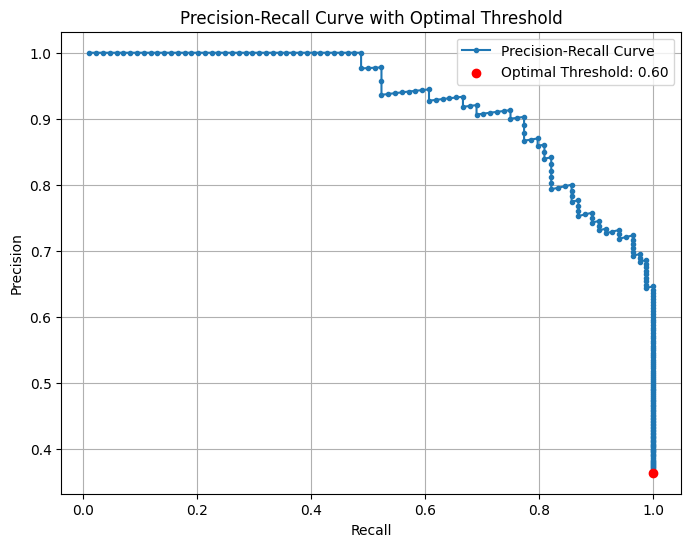

In [411]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall[:-1], precision[:-1], marker='.', label="Precision-Recall Curve")
plt.scatter(recall[np.argmax(manual_threshold)], precision[np.argmax(manual_threshold)], color='red', label=f"Optimal Threshold: {manual_threshold:.2f}", zorder=3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Optimal Threshold")
plt.legend()
plt.grid()
plt.show()